In [268]:
import re
import seaborn as sns
import pandas as pd
import numpy as np
from PIL import Image
import string, os, random, cv2
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn. metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Embedding, LSTM
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
# Task1

In [548]:
file = "youth_smoking_drug_data_10000_rows_expanded.csv"
df = pd.read_csv(file)

df['Gender'] = df['Gender'].replace({'Both': 0, 'Male': 1, 'Female': 2})

binary_columns = ['School_Programs', 'Access_to_Counseling', 'Substance_Education']
df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})

status_mapping = {'High': 1, 'Middle': 2, 'Low': 3}
df['Socioeconomic_Status'] = df['Socioeconomic_Status'].map(status_mapping)

age_group_mapping = {
    '10-14': 1, '15-19': 2, '20-24': 3, '25-29': 4,
    '30-39': 5, '40-49': 6, '50-59': 7, '60-69': 8,
    '70-79': 9, '80+': 10
}
df['Age_Group'] = df['Age_Group'].map(age_group_mapping)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df = df_scaled

print(df.head())


   Year  Age_Group  Gender  Smoking_Prevalence  Drug_Experimentation  \
0  1.00   0.111111     0.0            0.307778              0.373396   
1  1.00   0.000000     1.0            0.664000              0.526254   
2  0.75   0.000000     0.0            0.822222              0.780130   
3  1.00   0.555556     0.0            0.638889              0.548425   
4  0.75   0.111111     0.5            0.953333              0.493749   

   Socioeconomic_Status  Peer_Influence  School_Programs  Family_Background  \
0                   0.0        0.444444              1.0           0.000000   
1                   0.0        0.555556              1.0           1.000000   
2                   0.0        0.555556              1.0           0.111111   
3                   0.5        1.000000              0.0           0.888889   
4                   0.0        0.000000              0.0           0.111111   

   Mental_Health  Access_to_Counseling  Parental_Supervision  \
0       0.444444            

C:\Users\Edel\AppData\Local\Temp\ipykernel_16864\3624367586.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Both': 0, 'Male': 1, 'Female': 2})
C:\Users\Edel\AppData\Local\Temp\ipykernel_16864\3624367586.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})


In [550]:
df.shape

(10000, 15)

In [552]:
X = df.drop('Smoking_Prevalence', axis=1)
y = df['Smoking_Prevalence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4224)
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

In [554]:
model = keras.Sequential([
    keras.layers.Input(shape=(14,)), 
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.000005)
model.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer=optimizer)

history1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1076 - loss: 0.8019 - val_accuracy: 0.1510 - val_loss: 0.7826
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1731 - loss: 0.7760 - val_accuracy: 0.2245 - val_loss: 0.7589
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2519 - loss: 0.7545 - val_accuracy: 0.3310 - val_loss: 0.7360
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3523 - loss: 0.7315 - val_accuracy: 0.4435 - val_loss: 0.7137
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4692 - loss: 0.7077 - val_accuracy: 0.5525 - val_loss: 0.6920
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5824 - loss: 0.6859 - val_accuracy: 0.6615 - val_loss: 0.6707
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6902 - loss: 0.6638 - val_accuracy: 0.7490 - val_loss: 0.6497
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7674 - loss: 0.6443 - val_accuracy: 0.

In [555]:
results = model.evaluate(X_test, y_test, verbose=0)
print('Losses:', results[0])
print('Accuracy:', results[1])

Losses: 0.08442555367946625
Accuracy: 1.0


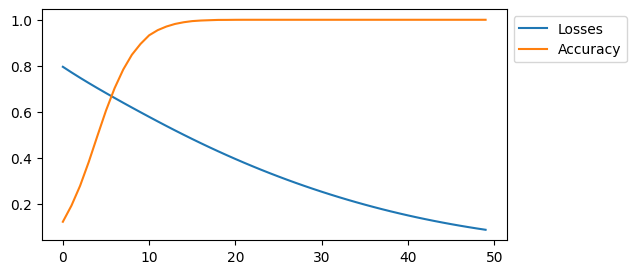

In [556]:
plt.figure(figsize=(6,3))
plt.plot(history1.history['loss'])
plt.plot(history1.history['accuracy'])
plt.legend(['Losses', 'Accuracy'], bbox_to_anchor = (1, 1))
plt.show()

In [481]:
# Task2   https://www.kaggle.com/datasets/rogeriovaz/villains-image-classification

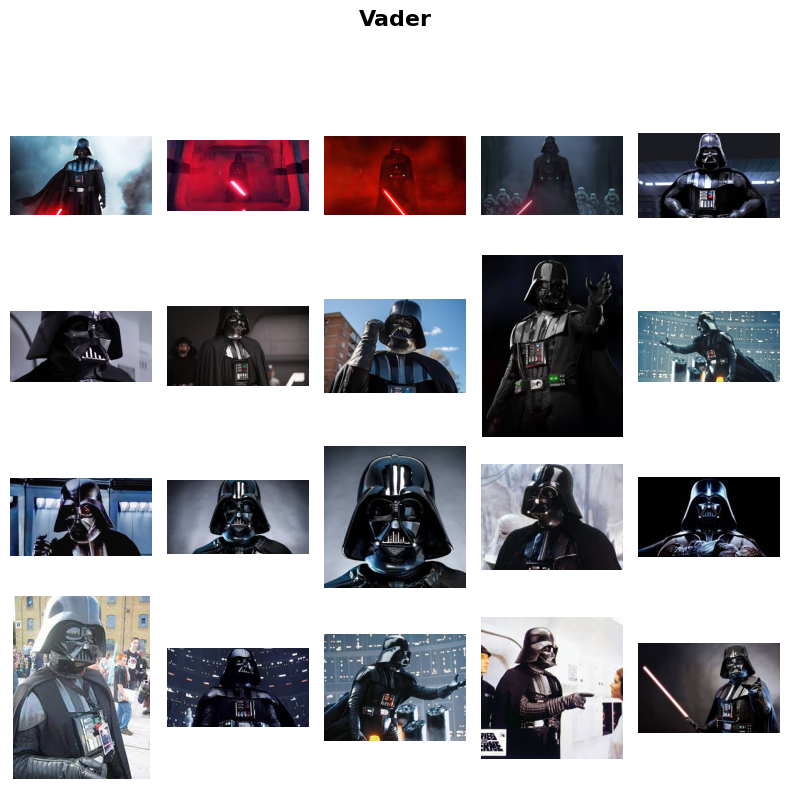

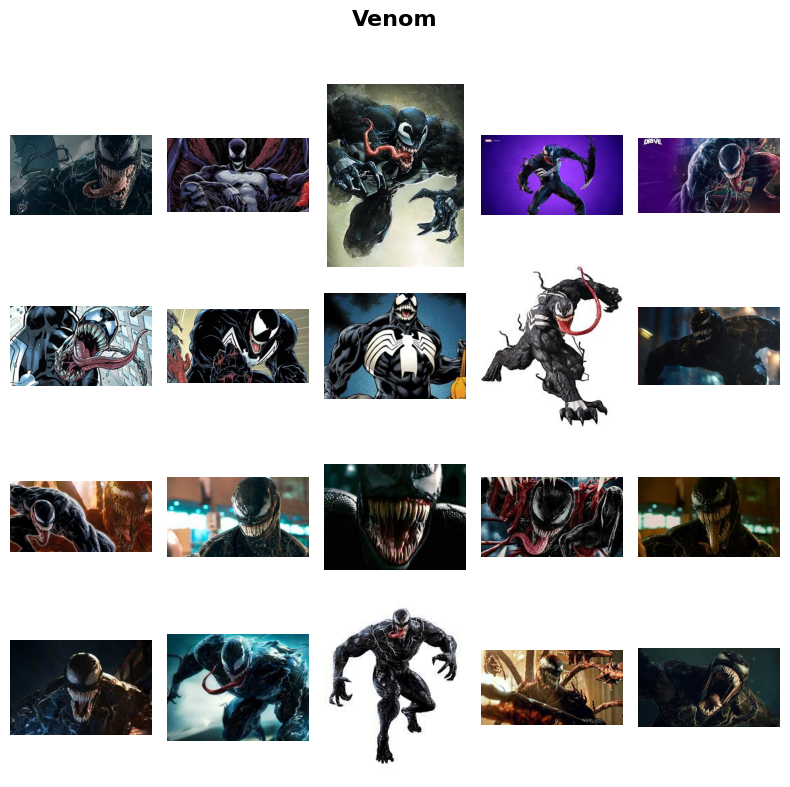

In [368]:
path = 'Villains/'
categories = ['Vader', 'Venom']

for category in categories:
    category_path = os.path.join(path, category)
    images = [f for f in os.listdir(category_path) if re.match(f"^{category}.*", f)][:20]

    fig, axes = plt.subplots(4, 5, figsize=(8, 8)) 
    fig.suptitle(category, fontsize=16, fontweight='bold')

    for ax, image_file in zip(axes.flatten(), images):
        image_path = os.path.join(category_path, image_file)
        img = plt.imread(image_path)
        ax.imshow(img)
        ax.axis('off') 

    plt.tight_layout(rect=[0, 0, 1, 0.95]) 
    plt.show()



In [369]:
x, y = [], []

for n, category in enumerate(categories):
    for f in os.listdir(path + category):
        image_path = path + category + '/' + f
        image = cv2.imread(image_path)
        try:
          image = cv2.resize(image, (30, 50))
          image = image / 255.0
          x.append(image)
          y.append(n)
        except:
          pass


In [371]:
x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.2)
y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)

print('x_train shape:', x_train.shape)
print('train number:', x_train.shape[0])
print('test number:', x_test.shape[0])

x_train shape: (253, 50, 30, 3)
train number: 253
test number: 64


In [406]:
model2 = Sequential([
    Input(shape=(253, 55, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

optimizer = Adam(learning_rate=0.009)
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

history2 = model2.fit(X_train2, y_train2, validation_data=(X_test2, y_test2), batch_size=32, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6962 - val_accuracy: 0.3000 - val_loss: 0.8033
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.5667 - loss: 0.7081 - val_accuracy: 0.3000 - val_loss: 0.7457
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.5667 - loss: 0.6831 - val_accuracy: 0.2000 - val_loss: 0.7153
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.6333 - loss: 0.6774 - val_accuracy: 0.2000 - val_loss: 0.7106
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.5667 - loss: 0.6733 - val_accuracy: 0.2000 - val_loss: 0.7237
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.6333 - loss: 0.6660 - val_accuracy: 0.2000 - val_loss: 0.7488
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.6333 - loss: 0.6580 - val_accuracy: 0.3000 - val_loss: 0.7753
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.6333 - loss: 0.6514 - val_accuracy: 0.2000 - val_l

In [407]:
results2 = model2.evaluate(X_test2, y_test2, verbose=0)
print('Losses:', results2[0])
print('Accuracy:', results2[1])

Losses: 0.279331237077713
Accuracy: 0.800000011920929


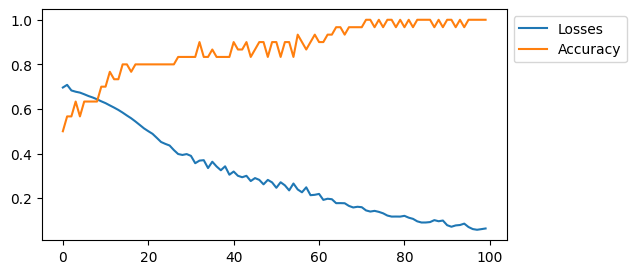

In [408]:
plt.figure(figsize=(6,3))
plt.plot(history2.history['loss'])
plt.plot(history2.history['accuracy'])
plt.legend(['Losses', 'Accuracy'], bbox_to_anchor = (1, 1))
plt.show()

In [401]:
# Task3

In [17]:
#import csv

#raw_file = "SMSSpamCollection"
#csv_file = "SMSSpamCollection.csv"

#with open(raw_file, 'r', encoding='utf-8') as infile:
#    with open(csv_file, 'w', newline='', encoding='utf-8') as outfile:
#        writer = csv.writer(outfile)    
#        writer.writerow(["Category", "Message"])     
#        for line in infile:
#            if line.strip():
#                category, message = line.split('\t', 1)
#                writer.writerow([category.strip(), message.strip()])

#print(f"Saved as {csv_file}")

In [28]:
df = pd.read_csv('SMSSpamCollection.csv', encoding='latin-1')
# https://archive.ics.uci.edu/dataset/228/sms+spam+collection
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
def cleaning(value):
    punctuation_cleaning = []
    stopwords_cleaning_string = ''
    
    for i in value:
        if i not in string.punctuation:
            punctuation_cleaning.append(i)
    punctuation_cleaning = "".join(punctuation_cleaning).split()
    
    for j in punctuation_cleaning:
        if j.lower() not in stopwords.words("english"):
            stopwords_cleaning_string += j.lower() + ' '
    
    return stopwords_cleaning_string

df['Message'] = df['Message'].apply(cleaning)

df.head()

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though


In [31]:
X3 = df['Message']
y3 = df['Category']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.5, random_state=123)

encoder = LabelEncoder()
y_train3 = encoder.fit_transform(y_train3) 
y_test3 = encoder.transform(y_test3)

In [32]:
token = Tokenizer(lower=False)
token.fit_on_texts(X_train3)
X_train3 = token.texts_to_sequences(X_train3)
X_test3 = token.texts_to_sequences(X_test3)

array = []
for i in X_train3:
    array.append(len(i))
maxlen = int(np.ceil(np.mean(array)))

X_train3 = pad_sequences(X_train3, maxlen=maxlen)
X_test3 = pad_sequences(X_test3, maxlen=maxlen)
total_words = len(token.word_index) + 1

In [37]:
model3 = Sequential([
    Embedding(total_words, 32, input_length=maxlen),
    LSTM(10),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.0001)
model3.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)

history3 = model3.fit(X_train3, y_train3, epochs=20, batch_size=32)

Epoch 1/20


C:\Users\Edel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8367 - loss: 0.6739
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8755 - loss: 0.5994
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8717 - loss: 0.4894
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8686 - loss: 0.3908
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8785 - loss: 0.3324
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8772 - loss: 0.2921
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9149 - loss: 0.2419
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9240 - loss: 0.2244
Epoch 9/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9331 - loss: 0.2164
Epoch 10/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9530 - loss: 0.1845
Epoch 11/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9566 - loss: 0.1711
Epoch 12/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9659 - loss: 0.1570


In [38]:
results3 = model3.evaluate(X_test3, y_test3, verbose=0)
print('Losses:', results3[0])
print('Accuracy:', results3[1])

Losses: 0.13876082003116608
Accuracy: 0.9673483967781067


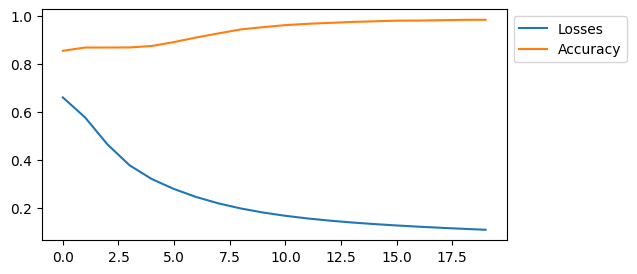

In [39]:
plt.figure(figsize=(6,3))
plt.plot(history3.history['loss'])
plt.plot(history3.history['accuracy'])
plt.legend(['Losses', 'Accuracy'], bbox_to_anchor = (1, 1))
plt.show()